<a href="https://colab.research.google.com/github/KaiyaBullock/MAT421/blob/main/ModB_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagrange Polynomial Interpolation

Lagrange Polynomial Interpolation finds a single polynomial that goes through all given data points. This is called the Lagrange Polynomial **$L(x)$**.

When computing we often write them as the linear combination of Lagrange basis polynomials, $P_{i}(x)=Π_{j=1,j/=i}^{n}\frac{x-x_{j}}{x_{i}-x_{j}}$ and $L(x)=Σ_{i=1}^{n}y_{i}P_{i}(x)$

$P_{i}(x)$ has the propertey that when $i=j, P_{i}(x_{j})=1$ and $P_{i}(x_{j})=0$ otherwise.


Example: Given the data set x=[2,3,4] and y=[4,-1,2] Let's look at the Lagrange Polynomial Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

In [8]:
x=[2,3,4]
y=[4,1,2]

x_new = np.arange(1.0,5.0,0.1)

f = lagrange(x,y)

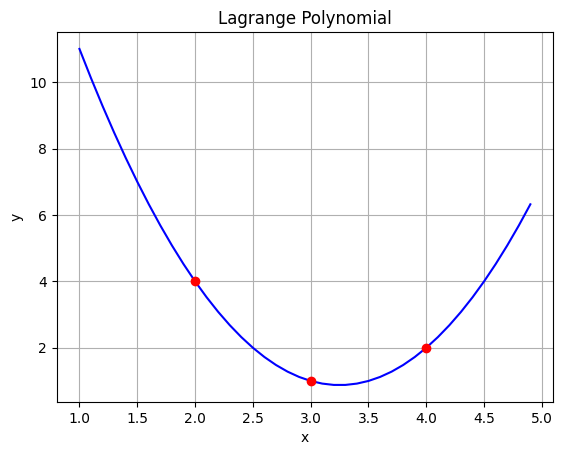

In [9]:
fig = plt.figure
plt.plot(x_new, f(x_new),'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Newton's Polynomial Interpolation

The general form of the $n-1$ oder Newton's polynomail that goes through $n$ points is $f(x)=Σ_{i=0}^{n}a_{i}n_{i}(x)$ where $n_{i}(x)=Π_{j=0}^{i-1}(x-x_{j})$.

The good thing about this form of interpolation is that once the coefficients are determined, they will not be affected by any new data points, only the new coeffients must be calculated.

Example: Given the data set x=[-6,-2,1,4] and y [-3,5,2,-1]. Let's look at the Newton's Polynomial Interpolation

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def divided_diff(x,y):
  n = len(y)
  coef = np.zeros([n,n])
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+j][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

def newton_poly(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x-x_data[n-k])*p
  return p

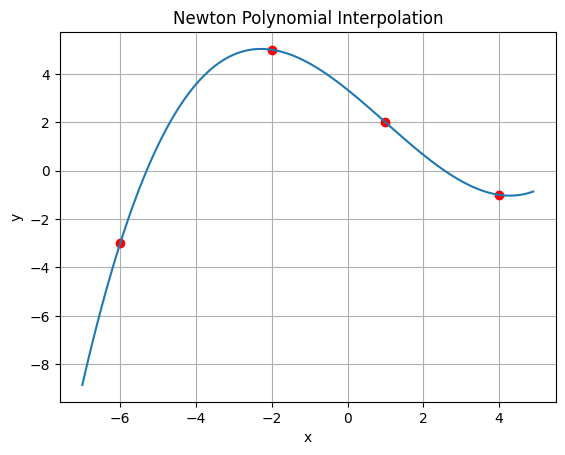

In [21]:
x = np.array([-6,-2,1,4])
y = np.array([-3,5,2,-1])
a_s = divided_diff(x,y)[0,:]

x_new = np.arange(-7, 5, 0.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure
plt.title('Newton Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)